In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


bran

# Hospital Locations in New Jersey USA

# 1. Introduction

1.1 Background

Cancer is the second leading cause of death in the Unites States, second only to heart disease. Even though the overall death rate from cancer has been decreasing due to a multitude of reasons including improved treatment options, increased awareness and lifestyle changes among the population; the number of cancer cases year over year has been steadily rising as evidenced by the charts below.

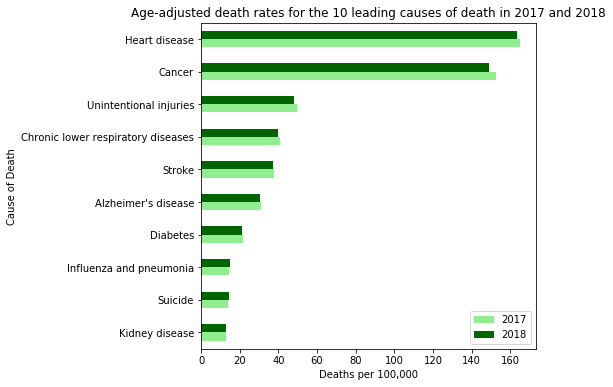

In [69]:
# Fetch the Leading Causes of Death CSV file from Watson object storage
my_leading_causes_file = project.get_file("Leading Causes of Death in US 2017and2018.csv")

# Load Leading Causes of Death data for USA into a dataframe leading_causes_df
leading_causes_df = pd.read_csv(my_leading_causes_file, dtype = {"Cause":str, "2017":float, "2018":float})

# Remove the index column
leading_causes_df.set_index("Cause",drop = True, inplace = True)
# Remove rows with NaN
leading_causes_df.dropna(inplace = True)
# Sort the dataframe in descending order of 2018 values 
leading_causes_df = leading_causes_df.sort_values('2017', ascending = True)

# Draw a bar chart to display the Leading Causes of Death in the US in 2017 and 2018
leading_causes_df.plot(kind = 'barh', figsize = (6, 6), color = ['lightgreen', 'darkgreen'])
plt.title('Age-adjusted death rates for the 10 leading causes of death in the US in 2017 and 2018')
plt.xlabel('Deaths per 100,000')
plt.ylabel('Cause of Death')

plt.show()


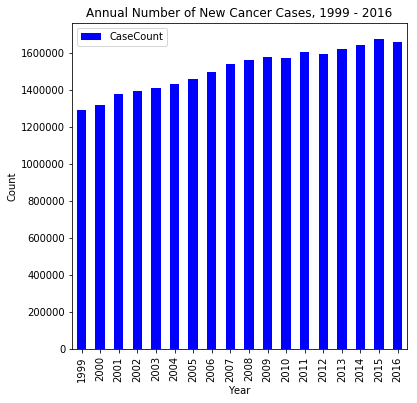

In [53]:
# Fetch the Year Over Year Trend CSV file from Watson object storage
my_yoy_trend_file = project.get_file("USCS_YearOverYearTrend.csv")

# Load Leading Causes of Death data for USA into a dataframe leading_causes_df
yoy_trend_df = pd.read_csv(my_yoy_trend_file, dtype = {"Year":str, "CaseCount":int})

# Remove the index column
yoy_trend_df.set_index("Year",drop = True, inplace = True)

# Draw a bar chart to display the Year Over Year Trend in Cancer Incidence in the US from 1999 to 2016
yoy_trend_df.plot(kind = 'bar', figsize = (6, 6), color = 'blue')
plt.title('Annual Number of New Cancer Cases in the US, 1999 - 2016')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

1.2 Problem

Cancer Hospitals USA (a fictitious group) is a group of premier cancer hospitals located in several locations in the US, including in New York City (NYC). They have a large percentage of patients who live in New Jersey (NJ). It is very difficult for the patients and their families to travel to NYC regularly – whether it be for consultation or outpatient treatment. Additionally, if the patient needs surgery then the caregiver often needs to stay in NYC for a few days. Obviously, this imposes a huge physical and financial burden on the families. 

In 2020, an estimated 53,340 new cases of cancer are expected to occur in NJ with the highest incidence for breast, lung and prostate cancers (see chart below). Considering this large number as well as the inconvenience posed to NJ residents when travelling to their NYC hospital, Cancer hospitals USA intends to open a brand-new state-of-the-art hospital in NJ. The management and Board of Directors would like data on the existing hospitals in NJ based on zip code so that they can pinpoint the location that would be most beneficial to the community as well as to the hospital.


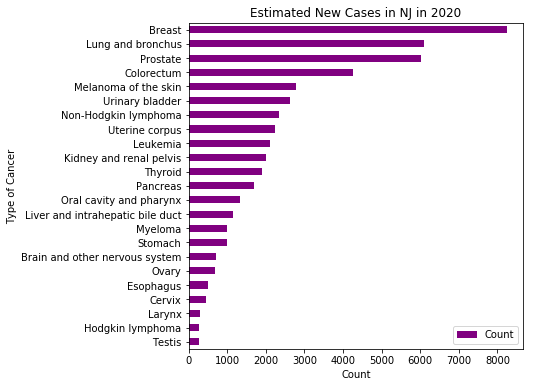

In [68]:
# Fetch the NJ New Cases Estimates CSV file from Watson object storage
my_nj_estimates_file = project.get_file("NJ_2020_NewCasesEstimates-1.csv")

# Load NJ New Cases Estimates data for NJ into a dataframe nj_estimates_df
nj_estimates_df = pd.read_csv(my_nj_estimates_file, dtype = {"Type":str, "Count":int})
nj_estimates_df

# Remove the index column
nj_estimates_df.set_index("Type",drop = True, inplace = True)
# Sort the dataframe in descending order of Count values 
nj_estimates_df = nj_estimates_df.sort_values('Count', ascending = True)

# Draw a bar chart to display the Year Over Year Trend in Cancer Incidence in the US from 1999 to 2016
nj_estimates_df.plot(kind = 'barh', figsize = (6, 6), color = 'purple')
plt.title('Estimated New Cancer Cases in NJ in 2020')
plt.xlabel('Count')
plt.ylabel('Type of Cancer')
plt.show()

# 2. Data Acquisition and Cleaning 

2.1 Data Sources and Acknowledgements

New Jersey zip code and latitude/longitude data was obtained from https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/. 
This data is free and is licensed under  Creative Commons Attribution Share-Alike (cc-by-sa) http://creativecommons.org/licenses/by-sa/4.0/

Population data for zip codes in New Jersey was obtained from https://www.newjersey-demographics.com/zip_codes_by_population

Leading causes of death in the US – CDC website at https://www.cdc.gov/nchs/products/databriefs/db355.htm

Us Cancer Statistics Year Over Year Trend – CDC website at https://gis.cdc.gov/Cancer/USCS/DataViz.html

New Jersey 2020 Estimates – Cancer Statistics Center of the American Cancer Society website at https://cancerstatisticscenter.cancer.org/#!/state/New%20Jersey
